## Quantum Circuits on both Simulators and IBM Quantum Computer

In this notebook, we are going to learn how to use Qiskit to define a simple circuit and to execute it on both simulators and the quantum computers of the IBM Quantum Experience.. 

We start by importing the necessary packages.

In [31]:
%matplotlib inline

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *
from qiskit.quantum_info import Statevector

## Defining the circuit

We are going to define a very simple circuit: we will use the $H$ gate to put a qubit in superposition and then we will measure it

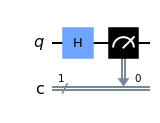

In [32]:
# Let's create a circuit to put a state in superposition and measure it

circ = QuantumCircuit(1,1) # We use one qubit and also one classical bit for the measure result 

circ.h(0) #We apply the H gate

circ.measure(range(1),range(1)) # We measure

circ.draw(output='mpl') #We draw the circuit

## Running the circuit on simulators

Once that we have defined the circuit, we can execute it on a simulator. 

{'0': 500, '1': 524}


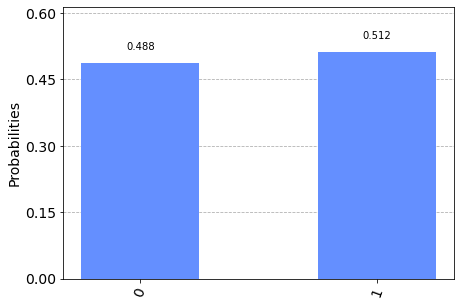

In [33]:
# Executing on the local simulator

backend_sim = Aer.get_backend('qasm_simulator') # We choose the backend

job_sim = execute(circ, backend_sim, shots=1024) # We execute the circuit, selecting the number of repetitions or 'shots'

result_sim = job_sim.result() # We collect the results

counts = result_sim.get_counts(circ) # We obtain the frequency of each result and we show them 
print(counts) 
plot_histogram(counts)



We can also run the circuit run the circuit with a simulator that computes the final state. For that, we need to create a circuit with no measures 

In [34]:
# Execution to the get the statevector

circ2 = QuantumCircuit(1,1)

circ2.h(0)

backend = Aer.get_backend('statevector_simulator') # We change the backend

job = execute(circ2, backend) # We execute the circuit with the new simulator. Now, we do not need repetitions

result = job.result() # We collect the results and access the stavector 
outputstate = result.get_statevector(circ2)
print(outputstate)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


Finally, we can also obtain the unitary matrix that represents the action of the circuit

In [35]:
backend = Aer.get_backend('unitary_simulator') # We change the backend again

job = execute(circ2, backend) # We execute the circuit

result = job.result() # We collect the results and obtain the matrix
unitary = result.get_unitary()
print(unitary)


Operator([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
          [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j]],
         input_dims=(2,), output_dims=(2,))


## Running the circuit on Quantum Computer

Now, we are going to use the quantum computers at the IBM Quantum Experience to use our circuit 

One you have created an IBMid account here: https://quantum-computing.ibm.com/

...in the below code, you will need to replace MY API TOKEN with the API number you have save into your clipboard.
Alternatively, you can load the account (if you have saved the Token in a file).

For more details, you can read here: https://github.com/Qiskit/qiskit-ibmq-provider

In [51]:
# Connecting to the real quantum computers
provider = IBMQ.enable_account('2bd1a6c08a6ee6a32cc95a3035f53b11fae70b895e391c630acfb5150361807cb7e5df387b74239571230324c9534822d1eb3b69fb424d80f4edbfc30ab320af')
provider.backends() # We retrieve the backends to check their status

for b in provider.backends():
    print(b.status().to_dict())

{'backend_name': 'ibmq_qasm_simulator', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 3, 'status_msg': 'active'}
{'backend_name': 'ibmq_armonk', 'backend_version': '2.4.29', 'operational': True, 'pending_jobs': 2, 'status_msg': 'active'}
{'backend_name': 'ibmq_santiago', 'backend_version': '1.3.47', 'operational': False, 'pending_jobs': 2021, 'status_msg': 'maintenance'}
{'backend_name': 'ibmq_bogota', 'backend_version': '1.6.20', 'operational': True, 'pending_jobs': 10, 'status_msg': 'active'}
{'backend_name': 'ibmq_lima', 'backend_version': '1.0.30', 'operational': True, 'pending_jobs': 18, 'status_msg': 'active'}
{'backend_name': 'ibmq_belem', 'backend_version': '1.0.34', 'operational': True, 'pending_jobs': 25, 'status_msg': 'active'}
{'backend_name': 'ibmq_quito', 'backend_version': '1.1.23', 'operational': True, 'pending_jobs': 1, 'status_msg': 'active'}
{'backend_name': 'simulator_statevector', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs

We can execute the circuit on IBM's quantum simulator (supports up to 32 qubits). We only need to select the appropriate backend.

{'0': 512, '1': 512}


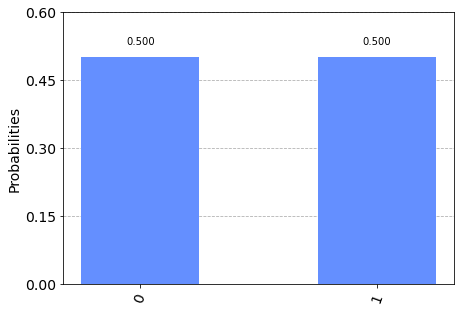

In [38]:
# Executing on the IBM Q Experience simulator

backend_sim = provider.get_backend('ibmq_qasm_simulator') # We choose the backend

job_sim = execute(circ, backend_sim, shots=1024) # We execute the circuit, selecting the number of repetitions or 'shots'

result_sim = job_sim.result() # We collect the results

counts = result_sim.get_counts(circ) # We obtain the frequency of each result and we show them 
print(counts) 
plot_histogram(counts)

To execute on one of the real quantum computers, we only need to select it as backend. We will use *job_monitor* to have live information on the job status 

In [39]:
# Executing on the quantum computer

backend = provider.get_backend('ibmq_armonk')

job_exp = execute(circ, backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run


When the job is done, we can collect the results and compare them to the ones obtaine with the simulator

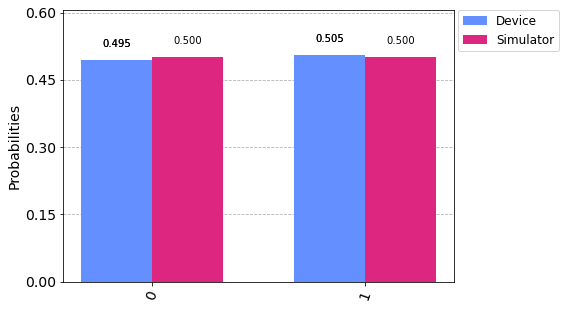

In [40]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

## EXERCISE TO DO

Based on the above notebook, execute both in a simulator and an IBM Quantum Computer the following circuit:

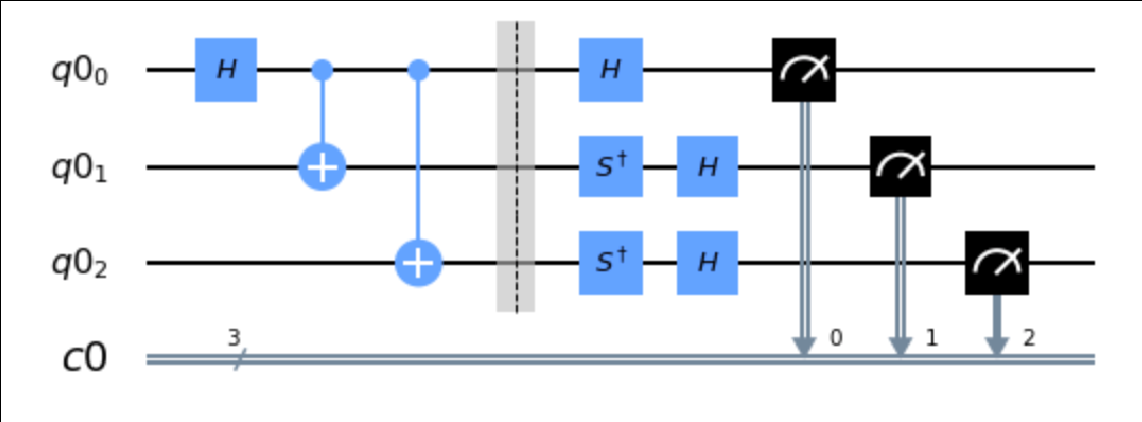

Comment on the final result (state) and provide your interpretation what this quantum circuit is doing.


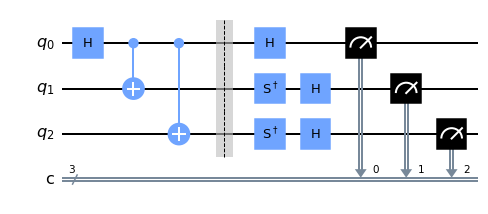

In [61]:
#Simulation
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

circ3 = QuantumCircuit(3,3)

circ3.h(0)

circ3.cx(0,1)
circ3.cx(0,2)

circ3.save_statevector()

circ3.h(0)

circ3.sdg(1)
circ3.h(1)

circ3.sdg(2)
circ3.h(2)

for i in range(3):
    circ3.measure(i,i)
circ3.draw('mpl')

{'111': 267, '010': 242, '001': 244, '100': 271}


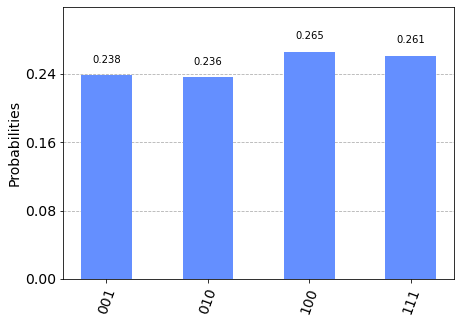

In [62]:
# Executing on the local simulator

backend_sim = Aer.get_backend('qasm_simulator') # We choose the backend

job_sim = execute(circ3, backend_sim, shots=1024) # We execute the circuit, selecting the number of repetitions or 'shots'

result_sim = job_sim.result() # We collect the results

counts = result_sim.get_counts(circ3) # We obtain the frequency of each result and we show them 
print(counts) 
plot_histogram(counts)

In [63]:
qobj = assemble(circ3)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result

out_state = result.get_statevector()

from qiskit.visualization import array_to_latex
array_to_latex(out_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

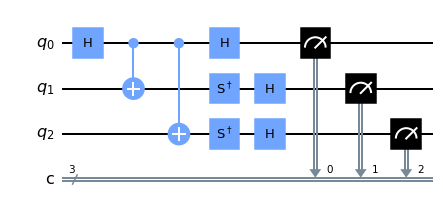

In [64]:
# Executing on the quantum computer
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

circ3 = QuantumCircuit(3,3)

circ3.h(0)

circ3.cx(0,1)
circ3.cx(0,2)

#circ3.save_statevector()

circ3.h(0)

circ3.sdg(1)
circ3.h(1)

circ3.sdg(2)
circ3.h(2)

for i in range(3):
    circ3.measure(i,i)
circ3.draw('mpl')

{'001': 236, '010': 262, '100': 272, '111': 254}


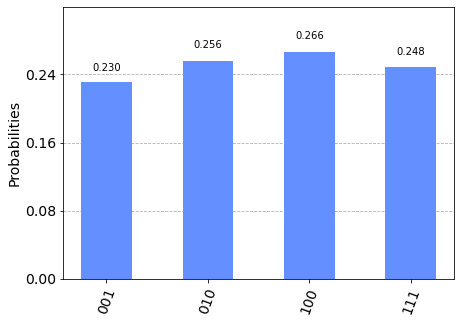

In [66]:
# Executing on the IBM Q Experience simulator

backend_sim = provider.get_backend('ibmq_qasm_simulator') # We choose the backend

job_sim = execute(circ3, backend_sim, shots=1024) # We execute the circuit, selecting the number of repetitions or 'shots'

result_sim = job_sim.result() # We collect the results

counts = result_sim.get_counts(circ3) # We obtain the frequency of each result and we show them 
print(counts) 
plot_histogram(counts)

In [68]:
# Executing on the quantum computer

backend = provider.get_backend('ibmq_quito')

job_exp = execute(circ3, backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run


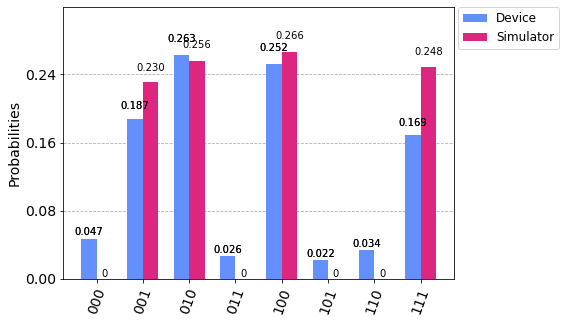

In [70]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ3)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

On dirait une porte qubit1 == qubit 2 (le troisième qubit vaut 1 que si les deux sont égaux dans l'histogramme, fréquence 0 pour les autres possibilités)